<a href="https://colab.research.google.com/github/Mohotasir/my_ML_Journey/blob/main/visualization_finalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import datetime as dt


In [ ]:
!pip install pandas dash

In [ ]:
df = pd.read_csv('historical_automobile_sales.csv')

In [ ]:
df.describe()

,Year,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales
count,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000
mean,2001.500000,0.214015,101.140170,0.575795,24964.991956,3067.456439,6.064394,40.073903,-0.242001,2.453977,2352.718068
std,12.710467,0.410526,10.601154,0.454477,4888.073433,1139.564637,1.968350,16.249714,0.861268,1.119019,1645.321284
min,1980.000000,0.000000,73.900000,0.000000,8793.663000,1009.000000,3.000000,12.508000,-4.227601,1.000000,102.000000
25%,1990.750000,0.000000,94.035000,0.250000,21453.300500,2083.500000,4.000000,27.237500,-0.574049,1.600000,793.950000
50%,2001.500000,0.000000,100.740000,0.500000,25038.691500,3072.000000,6.000000,39.214500,-0.013162,2.300000,2182.600000
75%,2012.250000,0.000000,108.240000,0.750000,28131.684750,4067.250000,8.000000,53.506500,0.388932,2.900000,3614.800000
max,2023.000000,1.000000,131.670000,1.500000,44263.657000,4983.000000,9.000000,70.374000,0.815074,6.000000,21147.000000


In [ ]:
df.head()

,Date,Year,Month,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales,Vehicle_Type,City
0,1/31/1980,1980,Jan,1,108.24,0.50,27483.571,1558,7,60.223,0.010000,5.4,456.0,Supperminicar,Georgia
1,2/29/1980,1980,Feb,1,98.75,0.75,24308.678,3048,4,45.986,-0.309594,4.8,555.9,Supperminicar,New York
2,3/31/1980,1980,Mar,1,107.48,0.20,28238.443,3137,3,35.141,-0.308614,3.4,620.0,Mediumfamilycar,New York
3,4/30/1980,1980,Apr,1,115.01,1.00,32615.149,1653,7,45.673,0.230596,4.2,702.8,Supperminicar,Illinois
4,5/31/1980,1980,May,1,98.72,0.20,23829.233,1319,4,52.997,0.138197,5.3,770.4,Smallfamiliycar,California


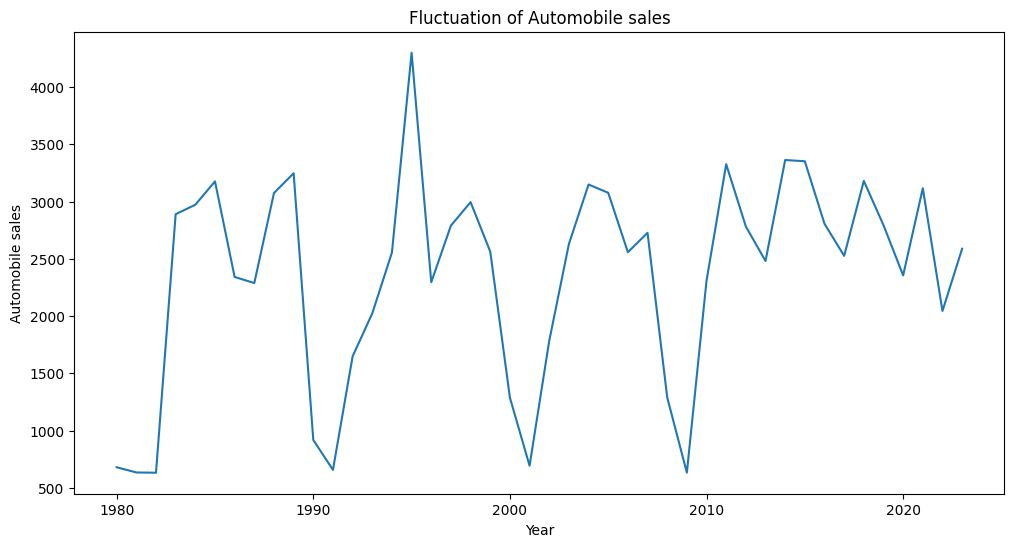

In [ ]:
adata = df.groupby('Year')['Automobile_Sales'].mean()
plt.figure(figsize=(12,6))
adata.plot(x = adata.index , y = adata.values)
plt.xlabel('Year')
plt.ylabel('Automobile sales')
plt.title('Fluctuation of Automobile sales')
plt.show()

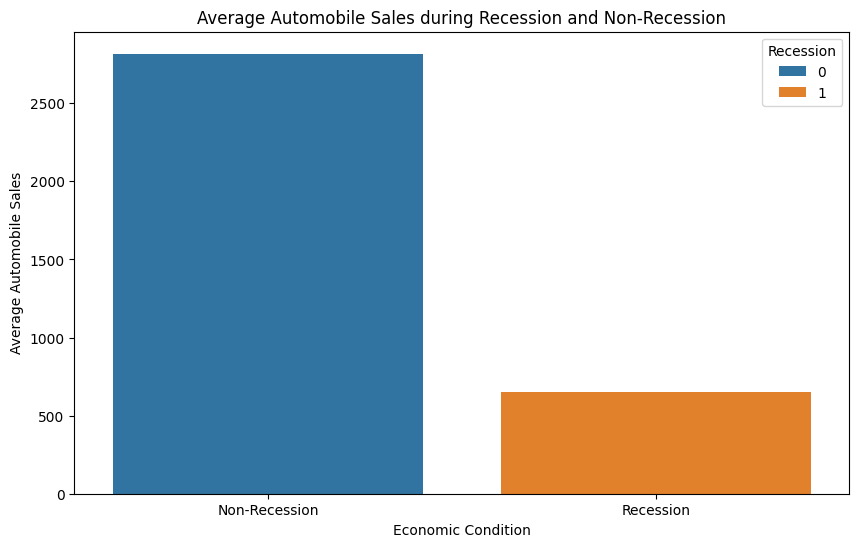

In [ ]:
    new_df = df.groupby('Recession')['Automobile_Sales'].mean().reset_index()

    # Create the bar chart using seaborn
    plt.figure(figsize=(10,6))
    sns.barplot(x='Recession', y='Automobile_Sales', hue='Recession',  data=new_df)
    plt.xlabel('Economic Condition')
    plt.ylabel('Average Automobile Sales')
    plt.title('Average Automobile Sales during Recession and Non-Recession')
    plt.xticks(ticks=[0, 1], labels=['Non-Recession', 'Recession'])
    plt.show()

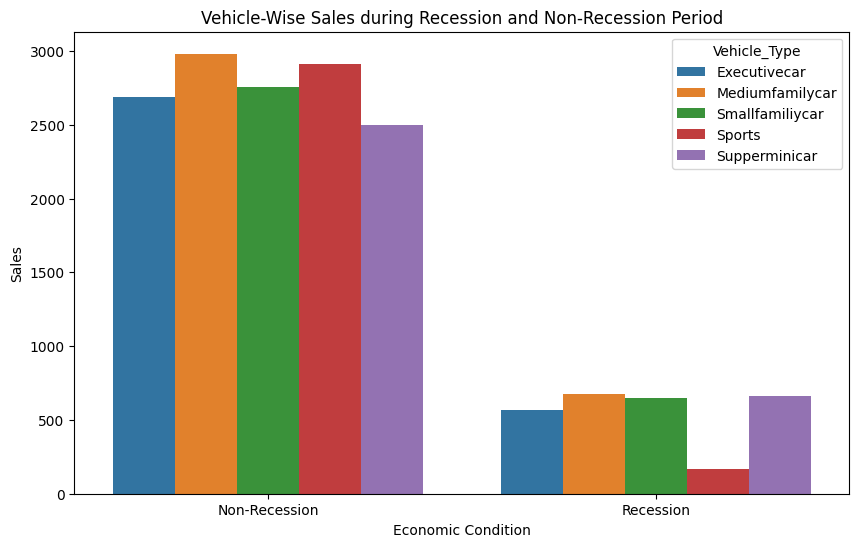

In [ ]:
    recession_data = df[df['Recession'] == 1]

    dd=df.groupby(['Recession','Vehicle_Type'])['Automobile_Sales'].mean().reset_index()
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Recession', y='Automobile_Sales', hue='Vehicle_Type', data=dd)
    plt.xticks(ticks=[0, 1], labels=['Non-Recession', 'Recession'])
    plt.xlabel('Economic Condition')
    plt.ylabel('Sales')
    plt.title('Vehicle-Wise Sales during Recession and Non-Recession Period')

    plt.show()

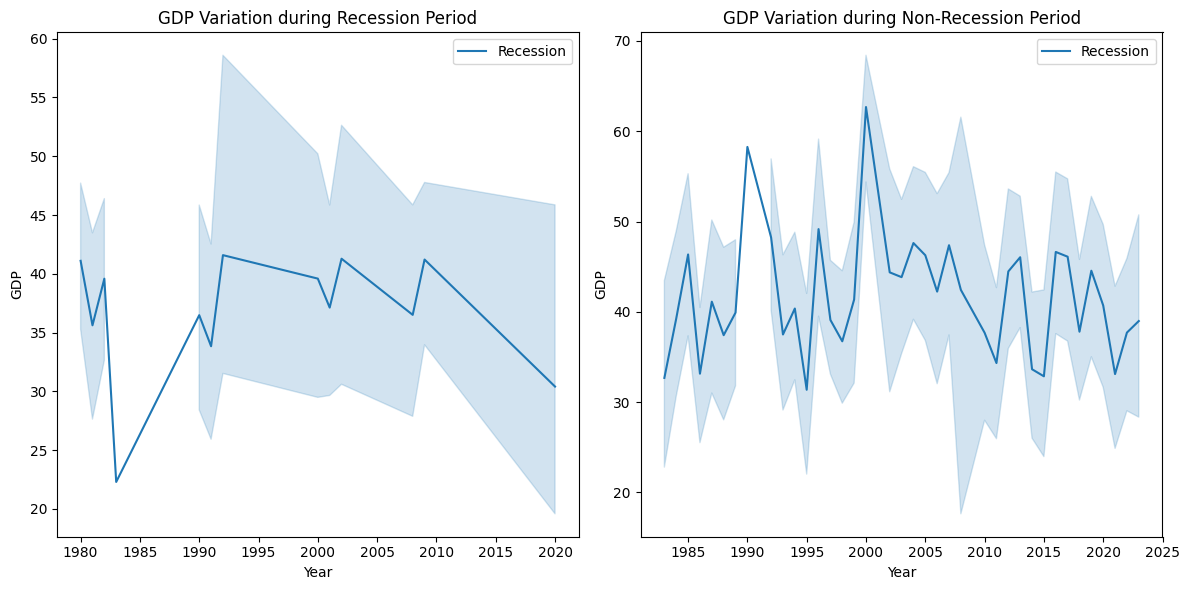

In [ ]:
    rec_data = df[df['Recession'] == 1]
    non_rec_data = df[df['Recession'] == 0]

    #Figure
    fig=plt.figure(figsize=(12, 6))

    #Create different axes for subplotingjm8
    ax0 = fig.add_subplot(1, 2, 1)
    ax1 = fig.add_subplot(1,2,2) # add subplot 2 (1 row, 2 columns, second plot).

    #plt.subplot(1, 2, 1)
    sns.lineplot(x='Year', y='GDP', data=rec_data, label='Recession', ax=ax0)
    ax0.set_xlabel('Year')
    ax0.set_ylabel('GDP')
    ax0.set_title('GDP Variation during Recession Period')

    #plt.subplot(1, 2, 2)
    sns.lineplot(x='Year', y='GDP', data=non_rec_data, label='Recession',ax=ax1)
    ax1.set_xlabel('Year')
    ax1.set_ylabel('GDP')
    ax1.set_title('GDP Variation during Non-Recession Period')

    plt.tight_layout()
    plt.show()


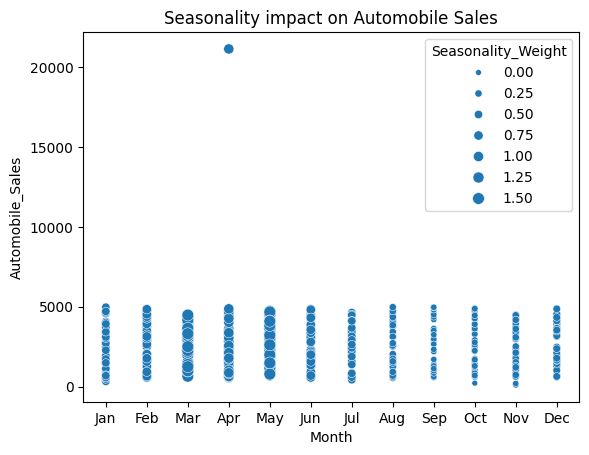

In [ ]:
    sns.scatterplot(data=df, x='Month', y='Automobile_Sales', size=df['Seasonality_Weight'])

    #you can further include hue='Seasonality_Weight', legend=False)

    plt.xlabel('Month')
    plt.ylabel('Automobile_Sales')
    plt.title('Seasonality impact on Automobile Sales')

    plt.show()

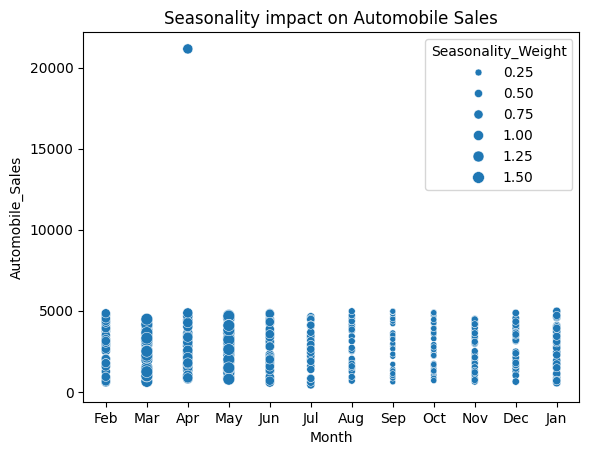

In [ ]:
    non_rec_data = df[df['Recession'] == 0]

    size=non_rec_data['Seasonality_Weight'] #for bubble effect

    sns.scatterplot(data=non_rec_data, x='Month', y='Automobile_Sales', size=size)

    #you can further include hue='Seasonality_Weight', legend=False)

    plt.xlabel('Month')
    plt.ylabel('Automobile_Sales')
    plt.title('Seasonality impact on Automobile Sales')

    plt.show()

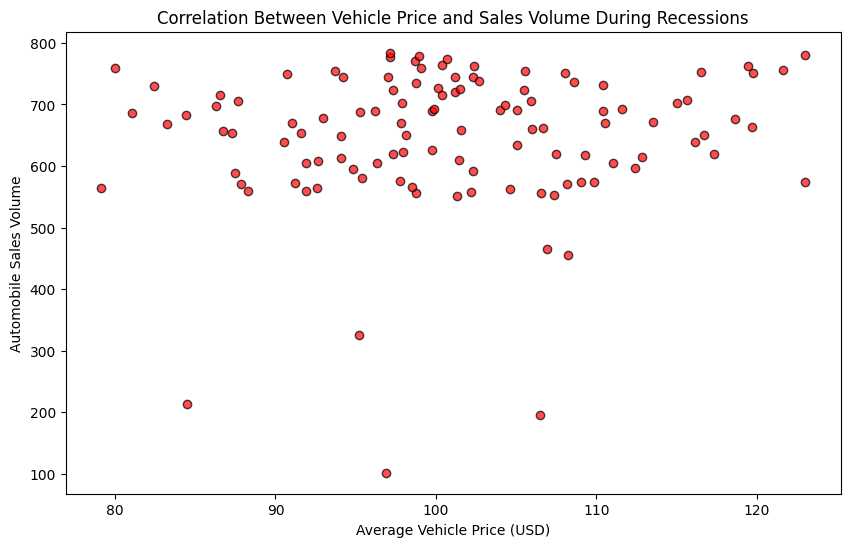

In [ ]:
recession_data = df[df['Recession'] == 1]

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(recession_data['Consumer_Confidence'], recession_data['Automobile_Sales'],
            color='red', alpha=0.7, edgecolors='black')

# Add labels and title
plt.xlabel('Average Vehicle Price (USD)')
plt.ylabel('Automobile Sales Volume')
plt.title('Correlation Between Vehicle Price and Sales Volume During Recessions')
plt.show()

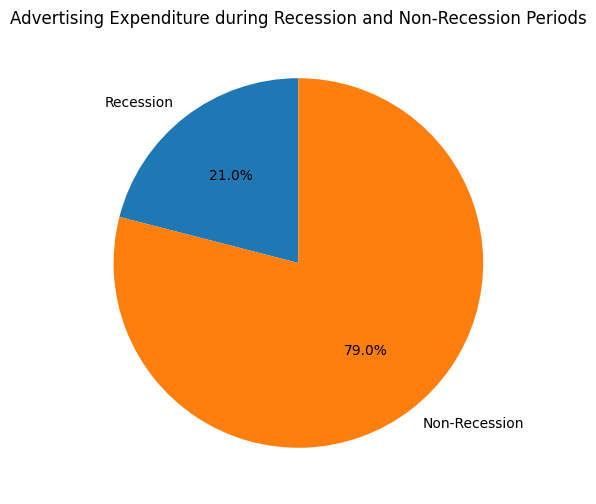

In [ ]:
    Rdata = df[df['Recession'] == 1]
    NRdata = df[df['Recession'] == 0]

    # Calculate the total advertising expenditure for both periods
    RAtotal = Rdata['Advertising_Expenditure'].sum()
    NRtotal = NRdata['Advertising_Expenditure'].sum()

    # Create a pie chart for the advertising expenditure
    plt.figure(figsize=(8, 6))

    labels = ['Recession', 'Non-Recession']
    sizes = [RAtotal, NRtotal]
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

    plt.title('Advertising Expenditure during Recession and Non-Recession Periods')

    plt.show()

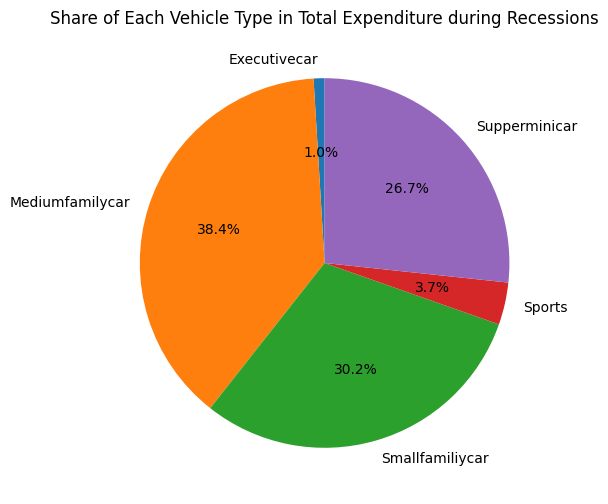

In [ ]:
    Rdata = df[df['Recession'] == 1]

    # Calculate the sales volume by vehicle type during recessions
    VTexpenditure = Rdata.groupby('Vehicle_Type')['Advertising_Expenditure'].sum()

    # Create a pie chart for the share of each vehicle type in total expenditure during recessions
    plt.figure(figsize=(12,6))

    labels = VTexpenditure.index
    sizes = VTexpenditure.values
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

    plt.title('Share of Each Vehicle Type in Total Expenditure during Recessions')

    plt.show()

In [ ]:
df.columns

Index(['Date', 'Year', 'Month', 'Recession', 'Consumer_Confidence',
       'Seasonality_Weight', 'Price', 'Advertising_Expenditure', 'Competition',
       'GDP', 'Growth_Rate', 'unemployment_rate', 'Automobile_Sales',
       'Vehicle_Type', 'City'],
      dtype='object')

<ipython-input-41-59a453784ef1>:2: UserWarning:


The markers list has fewer values (1) than needed (5) and will cycle, which may produce an uninterpretable plot.



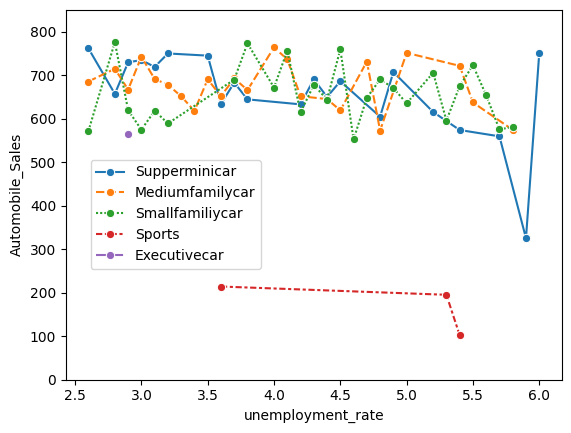

In [ ]:
df_rec = df[df['Recession']==1]
sns.lineplot(data=df_rec, x='unemployment_rate', y='Automobile_Sales',
             hue='Vehicle_Type', style='Vehicle_Type', markers='o', err_style=None)
plt.ylim(0,850)
plt.legend(loc=(0.05,.3))

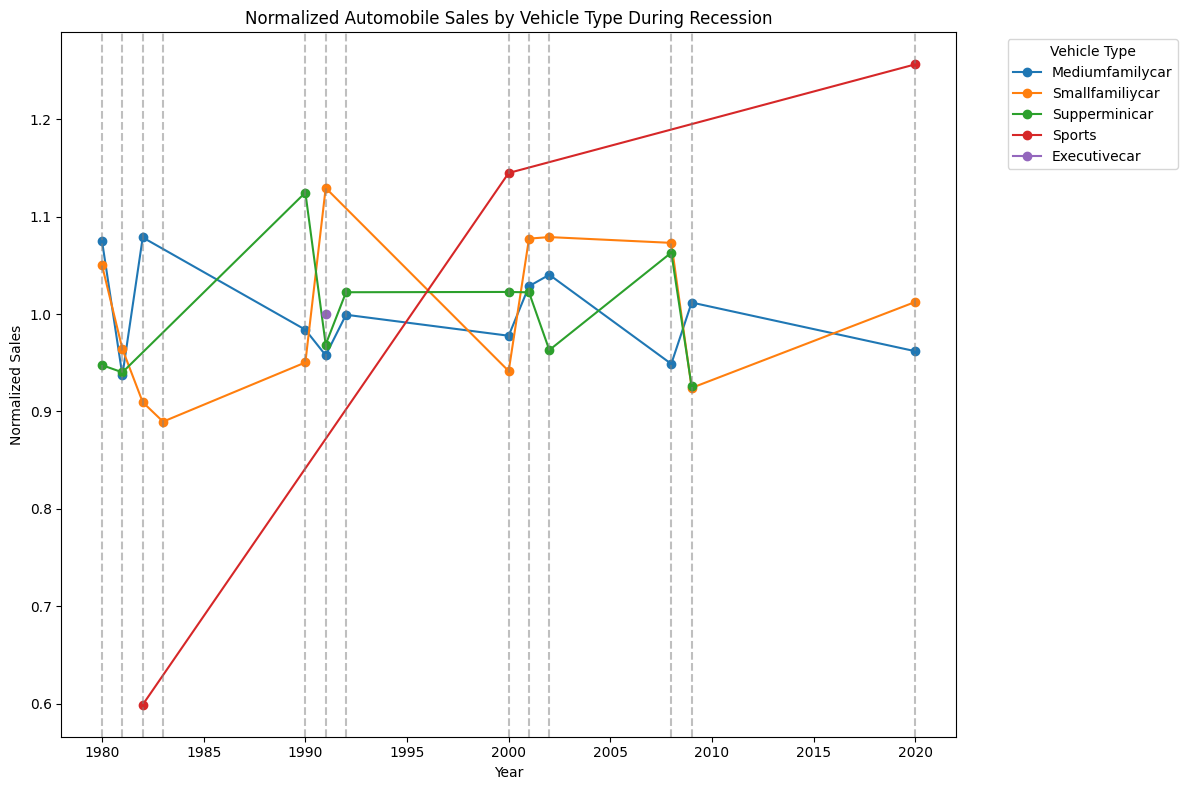

In [ ]:
df_rec = df[df['Recession'] == 1]

# Calculate the average automobile sales by year and vehicle type during the recession
df_Mline = df_rec.groupby(['Year', 'Vehicle_Type'], as_index=False)['Automobile_Sales'].mean()

# Calculate the normalized sales by dividing by the average sales for each vehicle type
df_Mline['Normalized_Sales'] = df_Mline.groupby('Vehicle_Type')['Automobile_Sales'].transform(lambda x: x / x.mean())

# Set the 'Year' as the index
df_Mline.set_index('Year', inplace=True)

# Create the plot for each vehicle type
plt.figure(figsize=(12, 8))
for vehicle_type in df_Mline['Vehicle_Type'].unique():
    data = df_Mline[df_Mline['Vehicle_Type'] == vehicle_type]
    plt.plot(data.index, data['Normalized_Sales'], label=vehicle_type, marker='o')

# Highlight recession years
recession_years = df_rec['Year'].unique()
for year in recession_years:
    plt.axvline(x=year, color='gray', linestyle='--', alpha=0.5)

# Add labels, legend, and title
plt.legend(title="Vehicle Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylabel("Normalized Sales")
plt.xlabel("Year")
plt.title("Normalized Automobile Sales by Vehicle Type During Recession")

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.express as px
import pandas as pd



# Initialize the Dash app
app = dash.Dash(__name__)

# Define the layout of the dashboard
app.layout = html.Div([
    html.H1("Automobile Sales Dashboard", style={'textAlign': 'center'}),

    # Dropdown for report selection
    html.Div([
        html.Label("Select Report Type"),
        dcc.Dropdown(
            id='report-type',
            options=[
                {'label': 'Yearly Statistics', 'value': 'Yearly Statistics'},
                {'label': 'Recession Period Statistics', 'value': 'Recession Period Statistics'}
            ],
            value='Yearly Statistics'
        )
    ], style={'width': '48%', 'display': 'inline-block'}),

    # Dropdown for year selection
    html.Div([
        html.Label("Select Year"),
        dcc.Dropdown(
            id='year-dropdown',
            options=[{'label': year, 'value': year} for year in df['Year'].unique()],
            disabled=False
        )
    ], style={'width': '48%', 'display': 'inline-block'}),

    html.Div(id='output-container'),
])

# Callback to enable/disable year dropdown based on report type
@app.callback(
    Output('year-dropdown', 'disabled'),
    Input('report-type', 'value')
)
def update_year_dropdown(report_type):
    return report_type == 'Recession Period Statistics'

# Callback for generating graphs
@app.callback(
    Output('output-container', 'children'),
    [Input('report-type', 'value'), Input('year-dropdown', 'value')]
)
def update_graphs(selected_statistics, input_year):
    if selected_statistics == 'Recession Period Statistics':
        recession_data = df[df['Recession'] == 1]
        yearly_rec = recession_data.groupby('Year')['Automobile_Sales'].mean().reset_index()
        R_chart1 = dcc.Graph(figure=px.line(yearly_rec, x='Year', y='Automobile_Sales', title="Automobile Sales Over Recession Period"))

        average_sales = recession_data.groupby('Vehicle_Type')['Automobile_Sales'].mean().reset_index()
        R_chart2 = dcc.Graph(figure=px.bar(average_sales, x='Vehicle_Type', y='Automobile_Sales', title="Average Sales by Vehicle Type"))

        exp_rec = recession_data.groupby('Vehicle_Type')['Advertising_Expenditure'].sum().reset_index()
        R_chart3 = dcc.Graph(figure=px.pie(exp_rec, values='Advertising_Expenditure', names='Vehicle_Type', title="Total Expenditure by Vehicle Type"))

        unemp_data = recession_data.groupby(['Unemployment_Rate', 'Vehicle_Type'])['Automobile_Sales'].mean().reset_index()
        R_chart4 = dcc.Graph(figure=px.bar(unemp_data, x='Unemployment_Rate', y='Automobile_Sales', color='Vehicle_Type',
                                           labels={'Unemployment_Rate': 'Unemployment Rate', 'Automobile_Sales': 'Avg Sales'},
                                           title='Effect of Unemployment Rate on Sales'))

        return [
            html.Div([R_chart1, R_chart2], style={'display': 'flex'}),
            html.Div([R_chart3, R_chart4], style={'display': 'flex'})
        ]

    elif selected_statistics == 'Yearly Statistics' and input_year:
        yearly_data = df[df['Year'] == input_year]
        yas = df.groupby('Year')['Automobile_Sales'].mean().reset_index()
        Y_chart1 = dcc.Graph(figure=px.line(yas, x='Year', y='Automobile_Sales', title="Yearly Automobile Sales"))

        mas = df.groupby('Month')['Automobile_Sales'].sum().reset_index()
        Y_chart2 = dcc.Graph(figure=px.line(mas, x='Month', y='Automobile_Sales', title="Total Monthly Sales"))

        avr_vdata = yearly_data.groupby('Vehicle_Type')['Automobile_Sales'].mean().reset_index()
        Y_chart3 = dcc.Graph(figure=px.bar(avr_vdata, x='Vehicle_Type', y='Automobile_Sales',
                                           title=f"Average Vehicles Sold by Type in {input_year}"))

        exp_data = yearly_data.groupby('Vehicle_Type')['Advertising_Expenditure'].sum().reset_index()
        Y_chart4 = dcc.Graph(figure=px.pie(exp_data, values='Advertising_Expenditure', names='Vehicle_Type',
                                           title='Total Advertisement Expenditure by Vehicle'))

        return [
            html.Div([Y_chart1, Y_chart2], style={'display': 'flex'}),
            html.Div([Y_chart3, Y_chart4], style={'display': 'flex'})
        ]

if __name__ == '__main__':
    app.run_server(debug=True)


<IPython.core.display.Javascript object>

In [ ]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.express as px
import pandas as pd



# Initialize the Dash app
app = dash.Dash(__name__)

# Define the layout of the dashboard
app.layout = html.Div([
    html.H1("Automobile Sales Dashboard", style={'textAlign': 'center'}),

    # Dropdown for report selection
    html.Div([
        html.Label("Select Report Type"),
        dcc.Dropdown(
            id='report-type',
            options=[
                {'label': 'Yearly Statistics', 'value': 'Yearly Statistics'},
                {'label': 'Recession Period Statistics', 'value': 'Recession Period Statistics'}
            ],
            value='Yearly Statistics'
        )
    ], style={'width': '48%', 'display': 'inline-block'}),

    # Dropdown for year selection
    html.Div([
        html.Label("Select Year"),
        dcc.Dropdown(
            id='year-dropdown',
            options=[{'label': year, 'value': year} for year in df['Year'].unique()],
            disabled=False
        )
    ], style={'width': '48%', 'display': 'inline-block'}),

    html.Div(id='output-container'),
])

# Callback to enable/disable year dropdown based on report type
@app.callback(
    Output('year-dropdown', 'disabled'),
    Input('report-type', 'value')
)
def update_year_dropdown(report_type):
    return report_type == 'Recession Period Statistics'

# Callback for generating graphs
@app.callback(
    Output('output-container', 'children'),
    [Input('report-type', 'value'), Input('year-dropdown', 'value')]
)
def update_graphs(selected_statistics, input_year):
    if selected_statistics == 'Recession Period Statistics':
        recession_data = df[df['Recession'] == 1]
        yearly_rec = recession_data.groupby('Year')['Automobile_Sales'].mean().reset_index()
        R_chart1 = dcc.Graph(figure=px.line(yearly_rec, x='Year', y='Automobile_Sales', title="Automobile Sales Over Recession Period"))

        average_sales = recession_data.groupby('Vehicle_Type')['Automobile_Sales'].mean().reset_index()
        R_chart2 = dcc.Graph(figure=px.bar(average_sales, x='Vehicle_Type', y='Automobile_Sales', title="Average Sales by Vehicle Type"))

        exp_rec = recession_data.groupby('Vehicle_Type')['Advertising_Expenditure'].sum().reset_index()
        R_chart3 = dcc.Graph(figure=px.pie(exp_rec, values='Advertising_Expenditure', names='Vehicle_Type', title="Total Expenditure by Vehicle Type"))

        unemp_data = recession_data.groupby(['Unemployment_Rate', 'Vehicle_Type'])['Automobile_Sales'].mean().reset_index()
        R_chart4 = dcc.Graph(figure=px.bar(unemp_data, x='Unemployment_Rate', y='Automobile_Sales', color='Vehicle_Type',
                                           labels={'Unemployment_Rate': 'Unemployment Rate', 'Automobile_Sales': 'Avg Sales'},
                                           title='Effect of Unemployment Rate on Sales'))

        return [
            html.Div([R_chart1, R_chart2], style={'display': 'flex'}),
            html.Div([R_chart3, R_chart4], style={'display': 'flex'})
        ]

    elif selected_statistics == 'Yearly Statistics' and input_year:
        yearly_data = df[df['Year'] == input_year]
        yas = df.groupby('Year')['Automobile_Sales'].mean().reset_index()
        Y_chart1 = dcc.Graph(figure=px.line(yas, x='Year', y='Automobile_Sales', title="Yearly Automobile Sales"))

        mas = df.groupby('Month')['Automobile_Sales'].sum().reset_index()
        Y_chart2 = dcc.Graph(figure=px.line(mas, x='Month', y='Automobile_Sales', title="Total Monthly Sales"))

        avr_vdata = yearly_data.groupby('Vehicle_Type')['Automobile_Sales'].mean().reset_index()
        Y_chart3 = dcc.Graph(figure=px.bar(avr_vdata, x='Vehicle_Type', y='Automobile_Sales',
                                           title=f"Average Vehicles Sold by Type in {input_year}"))

        exp_data = yearly_data.groupby('Vehicle_Type')['Advertising_Expenditure'].sum().reset_index()
        Y_chart4 = dcc.Graph(figure=px.pie(exp_data, values='Advertising_Expenditure', names='Vehicle_Type',
                                           title='Total Advertisement Expenditure by Vehicle'))

        return [
            html.Div([Y_chart1, Y_chart2], style={'display': 'flex'}),
            html.Div([Y_chart3, Y_chart4], style={'display': 'flex'})
        ]

if __name__ == '__main__':
    app.run_server(debug=True)


<IPython.core.display.Javascript object>